<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Описание данных

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра города (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition` — дата публикации

`floor` — этаж

`floors_total` — всего этажей в доме

`is_apartment` — апартаменты (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`last_price` — цена на момент снятия с публикации

`living_area` — жилая площадь в квадратных метрах (м²)

`locality_name` — название населённого пункта

`open_plan` — свободная планировка (булев тип)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`rooms` — число комнат

`studio` — квартира-студия (булев тип)

`total_area` — площадь квартиры в квадратных метрах (м²)

`total_images` — число фотографий квартиры в объявлении

## Изучение данных из файла

Перед началом работы импортируем библиотеки `pandas`, `seaborn` и  `matplotlib` и прочитаем файл с данными, предварительно сохранив его в отдельной переменной. Затем посмотрим, что представляет из себя таблица, выведя ее на экран.

In [1]:
# импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# чтение файла и просмотр таблицы
real = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
real

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Двух столбцов не видно в выводе, поэтому получим общую информацию о таблице командой `.info()`:

In [2]:
# вывод общей информации по таблице
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Также будет полезно получить общую статистику по таблице - это пригодится в анализе. Помним, что она годится только для количественных переменных.

In [3]:
# вывод описательной статистики по таблице
real.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

В таблице 22 столбца. Три столбца не соответствуют правилу змеиного_регистра, один из них имеет в названии заглавную букву. Необходимо переименовать их. Заметно, что количество данных в разных столбцах отличается - значит, есть пропуски.

Разберемся, что у нас с типами данных:

`first_day_exposition`: тип должен быть `datetime`, чтобы потом можно было создать таблицы с днем недели, месяцем и годом;

`is_apartment`: по условию должен быть тип `bool`, т.к. указывается, апартаменты это или нет (`False` или `True`);

Данные в следующих столбцах могут быть только целыми числами, поэтому разумно привести их к типу `int`: `floors_total`, `parks_around3000`, `ponds_around3000`, `days_exposition`, `balcony`, `parks_nearest`, `ponds_nearest`;

Данные в следующих столбцах могут иметь знаки после запятой, но будет удобнее, если они станут целыми числами (к тому же, нам не важна такая точность): `last_price`, `airports_nearest`, `cityCenters_nearest`.

Итак, мы увидели, с чем предстоит иметь дело. Теперь займемся ошибками и приведем данные в порядок.

## Предобработка данных

Первый и самый простой шаг: для удобства переименуем столбцы, название которых сразу бросается в глаза.

In [4]:
# переименование столбцов
real.rename(columns =
    {'cityCenters_nearest':'city_centers_nearest', 
     'parks_around3000':'parks_around_3km', 
     'ponds_around3000':'ponds_around_3km'},
            inplace = True)

# проверка названий столбцов
real.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3km', 'parks_nearest', 'ponds_around_3km',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Теперь разберемся с пропусками. Посмотрим, сколько их всего в таблице:

In [5]:
# подсчет пропусков
real.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3km         5518
parks_nearest           15620
ponds_around_3km         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# то же самое в процентах
real.isna().sum()/real.shape[0]*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around_3km        23.283683
parks_nearest           65.909954
ponds_around_3km        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Довольно много, причем в разных столбцах. Попробуем предположить, с чем это связано, и исправить.

`balcony`: если не указано число балконов — скорее всего, их нет. Можно заменить пропуски на 0.

In [7]:
# замена пропусков в столбце с балконами
real['balcony'] = real['balcony'].fillna(0)

`locality_name`: в объявлениях должен быть указан населенный пункт. Возможно, те люди, которые продают квартиру именно в Петербурге, не указывают местонахождение квартиры, потому что считают это очевидным. Можно заполнить пропуски только по тем строкам, где указано расстояние от центра города. Интернет ([ссылка](https://trace.ati.su/sitemap/trace/from/StPetersburg/to/KADShushary#:~:text=%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5%20%D0%BE%D1%82%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82%2D%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%D0%B0%20%D0%B4%D0%BE%20%D0%9A%D0%90%D0%94,%D0%BF%D0%BE%20%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D0%B5%20%C2%AB%D0%9F%D0%BB%D0%B0%D1%82%D0%BE%D0%BD%C2%BB%20%D1%81%D0%BE%D1%81%D1%82%D0%B0%D0%B2%D0%B8%D1%82%208)) говорит нам, что примерное расстояние от центра города до окраин равно 17 км. Укажем вместо пропусков "Санкт-Петербург" для тех квартир, которые находятся в пределах 17 км от центра. Причина неуказанного местоположения для других населенных пунктов непонятна. Так как в целом пропусков в этом столбце не так много, можно удалить все остальные строки.

In [8]:
# замена пропусков в столбце с локацией и удаление строк, в которых данные невозможно восстановить
real.loc[(real['locality_name'].isna()) 
         & (real['city_centers_nearest'] < 17000), 
         'locality_name'] = real['locality_name'].fillna('Санкт-Петербург')
real = real.dropna(subset = ['locality_name']).reset_index(drop = True)

`is_apartment`: данные имеют тип `object`, хотя по условию должно быть `bool`. Если заменить все пропуски на `False`, то тип данных исправится сам. Пропуски могут быть связаны с тем, что некоторые продавцы просто не знают разницы между апартаментами и квартирами, потому и не указывали ничего в этом пункте. Те, кто точно знает, что они продают апартаменты, отмечали это в объявлении. Возможно, неправильно заменять пропуски значением `False`, т.к. апартаментов в объявлениях может быть больше, но мы все равно не имеем возможности восстановить данные.

In [9]:
# замена пропусков в столбце с апартаментами
real['is_apartment'] = real['is_apartment'].fillna(value = False)

`floors_total`: количество этажей может быть необязательным к заполнению, это вполне объясняет пропуски. Нужно избавиться от них, однако жаль удалять 86 строк. Можно указать в них медианное количество этажей в населенном пункте с продаваемой квартирой.

In [10]:
# замена пропусков в столбце с количеством этажей
# сначала заменим пропуски на 0 и приведем тип к целочисленному
real['floors_total'] = real['floors_total'].fillna(0)
real['floors_total'] = real['floors_total'].astype('int')
# теперь создадим словарь-сводную таблицу, на основе которого потом будет работать функция
fl_total_median = dict(real.pivot_table(index = 'locality_name', 
                                        values = 'floors_total', 
                                        aggfunc = 'median')['floors_total'])
# напишем функцию для замены пропусков на медиану по населенному пункту
def fl_total_funс(row):
    locality = row['locality_name']
    floors = row['floors_total']
    if floors == 0:
        for key, value in fl_total_median.items():
            if key in locality:
                return value
    return floors
# применение функции и замена пропусков
real['floors_total'] = real.apply(fl_total_funс, axis = 1)

`days_exposition`: пропуски могут быть связаны с тем, что неизвестно, когда было закрыто объявление о продаже. Оно может быть еще активно: сделку еще не завершили либо завершили, но не закрыли на сайте. Здесь не подойдет медианное значение, поэтому оставим пропуски. Тип данных из-за этого изменить не получится, но это некритично.

`airports_nearest`: можно предположить, что данные рассчитаны системой на основе геолокации, т.к. значения расстояния точны до метра. Пропуски говорят о том, что в определенном радиусе от квартиры нет аэропорта. Рискну заменить недостающие данные на медиану расстояния по населенным пунктам.

In [11]:
# замена пропусков в столбце с расстоянием до аэропорта
# сначала заменим пропуски на 0 и приведем тип к целочисленному
real['airports_nearest'] = real['airports_nearest'].fillna(0)
real['airports_nearest'] = real['airports_nearest'].astype('int')
# теперь создадим словарь-сводную таблицу, на основе которого потом будет работать функция
airport_median = dict(real.pivot_table(index = 'locality_name', 
                                       values = 'airports_nearest', 
                                       aggfunc = 'median')['airports_nearest'])
# напишем функцию для замены пропусков на медиану по населенному пункту
def airport_func(row):
    locality = row['locality_name']
    airport_near_m = row['airports_nearest']
    if airport_near_m == 0:
        for key, value in airport_median.items():
            if key in locality:
                return value
    return airport_near_m
# применение функции и замена пропусков
real['airports_nearest'] = real.apply(airport_func, axis = 1)

Столбцы `parks_around_3km`, `parks_nearest`, `ponds_around_3km` и `ponds_nearest`: полагаю, эти данные тоже высчитываются системой автоматически, и здесь ничего не указывается по той причине, что в определенном радиусе от квартиры просто нет парков или водоемов. Думаю, здесь пропуски можно заменить на 0.

In [12]:
# замена пропусков в парках и водоемах
real['parks_around_3km'] = real['parks_around_3km'].fillna(0)
real['parks_nearest'] = real['parks_nearest'].fillna(0)
real['ponds_around_3km'] = real['ponds_around_3km'].fillna(0)
real['ponds_nearest'] = real['ponds_nearest'].fillna(0)

`city_centers_nearest`: пропуски могут быть связаны с тем, что населенный пункт находится слишком далеко от центра Петербурга - других соображений пока что нет. Возможно, это особенности работы системы. Так или иначе, делать с этими пропусками нечего. Оставим как есть.

`ceiling_height`: возможно, некоторые люди не знают высоту потолков или не считают обязательным указывать эту информацию, поэтому данные отсутствуют. Минимальная высота потолков по СНиП равна 2,5 метра. Посмотрим, какая высота потолков встречается чаще всего, и заменим пропуски на это значение.

Text(0.5, 0, 'Высота в метрах')

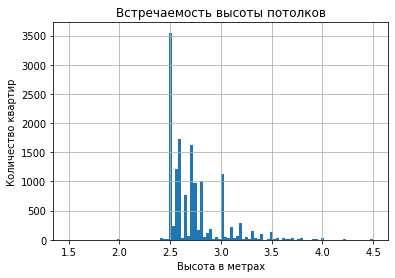

In [13]:
# визуализация частоты встречаемости высоты потолков
real['ceiling_height'].hist(bins = 100, range = (1.5, 4.5))
plt.title('Встречаемость высоты потолков')
plt.ylabel('Количество квартир')
plt.xlabel('Высота в метрах')

Чаще всего потолки бывают высотой 2,75 метра. Заменяем пропуски.

In [14]:
# замена пропусков по высоте потолков
real['ceiling_height'] = real['ceiling_height'].fillna(2.75)

Столбцы `living_area` и `kitchen_area`: скорее всего, не требуется обязательно указывать площадь, поэтому есть пустые ячейки. Посмотрим, что можно с ними сделать.

`living_area`: в этом столбце пропуски составляют всего 8%, но это важные данные, поэтому надо заполнить недостающую информацию. Медианой заполнять не станем, т.к. даже вдали от города могут быть большие квартиры. Можно посмотреть, есть ли корреляция между жилой и общей площадью, и заменить пропуски на отношение средней жилой площади к жилой площади по строке.

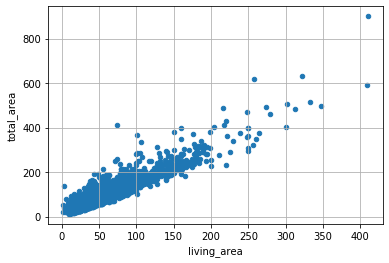

In [15]:
# график зависимости жилой и общей площади
real.plot(x = 'living_area', y = 'total_area', kind = 'scatter', grid = True) 

In [16]:
# проверка корреляции
real['living_area'].corr(real['total_area'])

0.9395559291835021

График и корреляция говорят о том, что жилая и общая площадь сильно зависимы друг от друга. Можно производить замену.

In [17]:
living_area_median = (real['living_area'] / real['total_area']).median()
real['living_area'] = real['living_area'].fillna(real['total_area'] * living_area_median)

`kitchen_area`: надо выяснить, отсутствуют ли данные только по квартирам-студиям или по всей таблице. В студиях можно заменить площадь кухни на 0. В остальных квартирах можно поставить маркер пропуска (например, -1).

In [18]:
# проверка количества пропусков по площади кухни
print('Количество пропусков по kitchen_area:', real['kitchen_area'].isna().sum())
# проверка количества пропусков по площади кухни в студиях
print('Количество пропусков по kitchen_area в студиях:',real.query('studio == True')['kitchen_area'].isna().sum())

Количество пропусков по kitchen_area: 2274
Количество пропусков по kitchen_area в студиях: 149


В квартирах-студиях пропусков немного. Заменим их на 0, в остальных квартирах на -1.

In [19]:
# замена пропусков на маркер
real['kitchen_area'] = real['kitchen_area'].fillna(-1)

In [20]:
# замена значений площади кухни в студиях
real.loc[real['studio'] == True, 'kitchen_area'] = 0
# проверка замены
real.loc[real['studio'] == True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.75,24.0,15.500000,2,False,...,0.0,2.0,посёлок Мурино,0.0,NaN,0.0,0.0,0.0,0.0,181.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.75,17.0,24.750000,4,False,...,0.0,2.0,Санкт-Петербург,38171.0,15015.0,0.0,0.0,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.75,10.0,14.199656,7,False,...,0.0,0.0,посёлок Шушары,17380.5,NaN,0.0,0.0,0.0,0.0,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.500000,21,False,...,0.0,0.0,деревня Кудрово,0.0,NaN,0.0,0.0,0.0,0.0,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.000000,1,False,...,0.0,0.0,посёлок Шушары,18654.0,29846.0,0.0,0.0,0.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22848,8,3090000.0,30.00,2017-12-17T00:00:00,0,2.75,25.0,18.200000,5,False,...,0.0,0.0,Санкт-Петербург,35250.0,16414.0,0.0,0.0,1.0,400.0,211.0
22858,2,4280000.0,28.00,2017-10-26T00:00:00,0,2.70,19.0,18.000000,10,False,...,0.0,0.0,Санкт-Петербург,18982.0,7206.0,0.0,0.0,1.0,415.0,151.0
23190,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.75,25.0,18.000000,16,False,...,0.0,0.0,Санкт-Петербург,11405.0,13222.0,0.0,0.0,1.0,623.0,14.0
23534,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.75,19.0,14.767642,8,False,...,0.0,0.0,Санкт-Петербург,18090.0,17092.0,0.0,0.0,2.0,112.0,31.0


Осталось только проверить количество пропусков после всех изменений.

In [21]:
# проверка пропусков после заполнения
real.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest    5511
parks_around_3km           0
parks_nearest              0
ponds_around_3km           0
ponds_nearest              0
days_exposition         3180
dtype: int64

Пропусков не осталось. Теперь необходимо привести данные к нужным типам, как было решено на этапе изучения данных.

In [22]:
# замена типа в столбце с датой
real['first_day_exposition'] = pd.to_datetime(real['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
# замена типов в остальных столбцах
real['balcony'] = real['balcony'].astype(int)
real['parks_around_3km'] = real['parks_around_3km'].astype(int)
real['ponds_around_3km'] = real['ponds_around_3km'].astype(int)
real['parks_nearest'] = real['parks_nearest'].astype(int)
real['ponds_nearest'] = real['ponds_nearest'].astype(int)
# деление данных с ценой на 1000 для удобства восприятия
real['last_price'] = (real['last_price']/1000*1.0).round().astype(int)

### Вывод

В данных было много пропусков, без заполнения которых при последующем анализе постоянно появлялись бы разные ошибки, как вычислительные, так и программные. Без работы с пропусками никак нельзя было идти дальше, но теперь нас ничто не останавливает. Данные в порядке.

## Расчёты и добавление результатов в таблицу

Нам нужно посчитать и добавить в таблицу

* цену квадратного метра;

* день недели, месяц и год публикации объявления;

* этаж квартиры; варианты — первый, последний, другой;

* соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [23]:
# расчет цены квадратного метра: делим цену квартиры на ее общую площадь
real['price_m2'] = real['last_price']/real['total_area']
# для удобства приведем к целочисленному типу
real['price_m2'] = real['price_m2'].astype(int)

# добавление дня недели, месяца и года публикации объявления
real['day_exposition']  = real['first_day_exposition'].dt.weekday
real['month_exposition']  = real['first_day_exposition'].dt.month
real['year_exposition']  = real['first_day_exposition'].dt.year

# создание функции, определяющей этаж квартиры
def floor_number(row):
    floor = row['floor']
    if floor == 1:
        return('первый')
    elif floor == row['floors_total']:
        return('последний')
    return('другой')
# добавление столбца с указанием этажа
real['floor_number'] = real.apply(floor_number, axis = 1)

# добавление столбцов с соотношением площадей
real['living_total_ratio'] = real['living_area'] / real['total_area']
real['kitchen_total_ratio'] = real['kitchen_area'] / real['total_area']

# проверка всех изменений
real.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3km,ponds_nearest,days_exposition,price_m2,day_exposition,month_exposition,year_exposition,floor_number,living_total_ratio,kitchen_total_ratio
0,20,13000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,2,755,NaN,120,3,3,2019,другой,0.472222,0.231481
1,7,3350,40.4,2018-12-04,1,2.75,11.0,18.600000,1,False,...,0,0,81.0,82,1,12,2018,первый,0.460396,0.272277
2,10,5196,56.0,2015-08-20,2,2.75,5.0,34.300000,4,False,...,2,574,558.0,92,3,8,2015,другой,0.612500,0.148214
3,0,64900,159.0,2015-07-24,3,2.75,14.0,90.309811,9,False,...,3,234,424.0,408,4,7,2015,другой,0.567986,-0.006289
4,2,10000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,1,48,121.0,100,1,6,2018,другой,0.320000,0.410000


Все получилось.

### Вывод

Все необходимые данные добавлены в таблицу, соответствующие столбцы созданы. Они облегчат дальнейший анализ.

## Исследовательский анализ данных

Первое задание: 

* изучить площадь, цену, число комнат, высоту потолков; 
* построить гистограммы для каждого параметра.

In [24]:
# создание функций для всех будущих графиков
def hist_func(column, xmin, xmax):
    real[column].hist(bins = 60, range = (xmin, xmax))

def boxplot_func(column, ymin = -5, ymax = 200):
    plt.ylim(ymin, ymax)
    real.boxplot(column)

Начнем с анализа общей площади.

In [25]:
# вывод описательной статистики 
real['total_area'].describe()

count    23679.000000
mean        60.342856
std         35.656865
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

Построим графики.

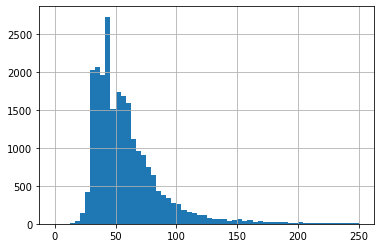

In [26]:
# гистограмма
hist_func('total_area', 0, 250)

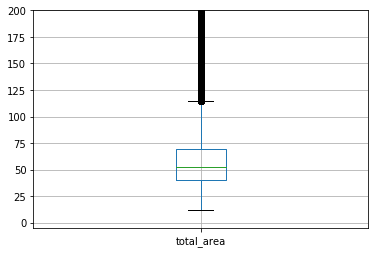

In [27]:
# ящик с усами
boxplot_func('total_area')

Нормальный диапазон площади квартир - от 12 до 115 кв.м. (примерно). Наибольшее количество квартир имеет площадь 25-60 кв.м. Есть квартиры площадью до 900 кв.м., но таких немного и они считаются выбросами. Есть мощный пик у значения 45 кв.м., далее число квартир с большей площадью стремительно убывает. Средним значением можно считать площадь 52 кв.м.

Необходимо избавиться от выбивающихся значений.

In [28]:
# фильтрация данных
real = real.query('total_area <= 115')

Теперь изучим цену в объявлениях.

In [29]:
# вывод описательной статистики 
# данные с ценой в тысячах
real['last_price'].describe()

count    22463.000000
mean      5316.210346
std       3412.450767
min         12.000000
25%       3369.500000
50%       4500.000000
75%       6300.000000
max      82000.000000
Name: last_price, dtype: float64

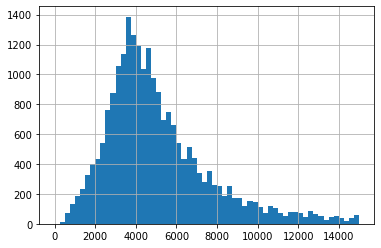

In [30]:
# гистограмма
# данные в тысячах
hist_func('last_price', 0, 15000)

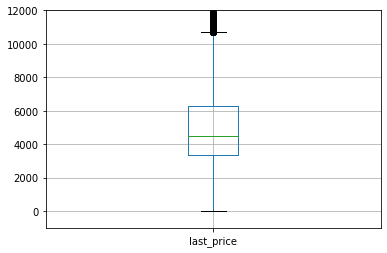

In [31]:
# ящик с усами
# данные в тысячах
boxplot_func('last_price', -1000, 12000)

Нормальный диапазон цены - от 0 до 10,5 млн. Странно, что кто-то может продавать квартиры слишком уж дешево (минимальная цена равна 12 тысячам). Необходимо будет проверить, много ли объявлений с маленькой ценой, и избавиться от них.

Наибольшее количество квартир продается за 3-5,5 млн. Пик приходится примерно на 4 млн. Самая дорогая квартира продается за 763 миллиона (кто-то живет в роскоши?). Квартир с ценой больше 8-9 млн становится все меньше. Средним значением будем считать 4,65 млн рублей.

Избавляемся от выбросов.

In [32]:
# фильтрация данных
real = real.query('last_price <= 10500')

Проанализируем количество комнат в продаваемых квартирах.

In [33]:
# вывод описательной статистики
real['rooms'].describe()

count    21047.000000
mean         1.898180
std          0.885458
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

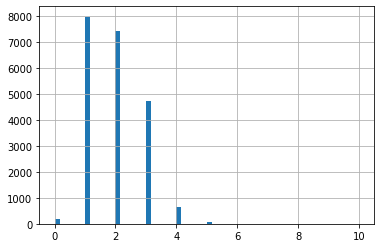

In [34]:
# гистограмма
hist_func('rooms', 0, 10)

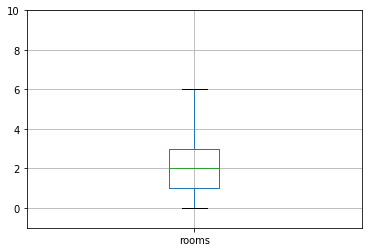

In [35]:
# ящик с усами
boxplot_func('rooms', -1, 10)

Есть минимальное значение - 0 комнат в квартире. Необходимо проверить, студии ли это.

Средним значением можно считать 2 комнаты. В большинстве квартир 1-3 комнаты. Нормальные значения находятся в пределах 0-6 комнат. От остальных можно избавляться.

In [36]:
# фильтрация данных
real = real.query('rooms <= 6')

In [37]:
# проверка - 0 комнат
real.loc[real['rooms'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3km,ponds_nearest,days_exposition,price_m2,day_exposition,month_exposition,year_exposition,floor_number,living_total_ratio,kitchen_total_ratio
144,1,2450,27.00,2017-03-30,0,2.75,24.0,15.500000,2,False,...,0,0,181.0,90,3,3,2017,другой,0.574074,0.000000
349,4,2320,25.00,2017-09-27,0,2.75,14.0,17.000000,1,False,...,0,0,45.0,92,2,9,2017,первый,0.680000,-0.040000
440,8,2480,27.11,2018-03-12,0,2.75,17.0,24.750000,4,False,...,2,982,64.0,91,0,3,2018,другой,0.912947,0.000000
508,0,3375,34.40,2017-03-28,0,2.75,26.0,24.300000,19,False,...,1,593,430.0,98,1,3,2017,другой,0.706395,-0.029070
608,2,1850,25.00,2019-02-20,0,2.75,10.0,14.199656,7,False,...,0,0,29.0,74,2,2,2019,другой,0.567986,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23190,7,3200,26.00,2017-09-01,0,2.75,25.0,18.000000,16,False,...,1,623,14.0,123,4,9,2017,другой,0.692308,0.000000
23422,0,2500,27.70,2017-09-28,0,2.75,24.0,18.000000,4,False,...,0,0,4.0,90,3,9,2017,другой,0.649819,-0.036101
23534,15,3350,26.00,2018-09-07,0,2.75,19.0,14.767642,8,False,...,2,112,31.0,128,4,9,2018,другой,0.567986,0.000000
23572,10,1450,29.00,2017-11-11,0,2.75,9.0,18.000000,8,False,...,0,0,82.0,50,5,11,2017,другой,0.620690,-0.034483


In [38]:
# проверка количества студий
real.loc[real['studio'] == True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3km,ponds_nearest,days_exposition,price_m2,day_exposition,month_exposition,year_exposition,floor_number,living_total_ratio,kitchen_total_ratio
144,1,2450,27.00,2017-03-30,0,2.75,24.0,15.500000,2,False,...,0,0,181.0,90,3,3,2017,другой,0.574074,0.0
440,8,2480,27.11,2018-03-12,0,2.75,17.0,24.750000,4,False,...,2,982,64.0,91,0,3,2018,другой,0.912947,0.0
608,2,1850,25.00,2019-02-20,0,2.75,10.0,14.199656,7,False,...,0,0,29.0,74,2,2,2019,другой,0.567986,0.0
697,12,2500,24.10,2017-12-01,0,2.75,25.0,17.500000,21,False,...,0,0,201.0,103,4,12,2017,другой,0.726141,0.0
716,5,1500,17.00,2017-06-07,0,2.70,9.0,12.000000,1,False,...,0,0,40.0,88,2,6,2017,первый,0.705882,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22848,8,3090,30.00,2017-12-17,0,2.75,25.0,18.200000,5,False,...,1,400,211.0,103,6,12,2017,другой,0.606667,0.0
22858,2,4280,28.00,2017-10-26,0,2.70,19.0,18.000000,10,False,...,1,415,151.0,152,3,10,2017,другой,0.642857,0.0
23190,7,3200,26.00,2017-09-01,0,2.75,25.0,18.000000,16,False,...,1,623,14.0,123,4,9,2017,другой,0.692308,0.0
23534,15,3350,26.00,2018-09-07,0,2.75,19.0,14.767642,8,False,...,2,112,31.0,128,4,9,2018,другой,0.567986,0.0


Получается, что комнат с 0 комнат больше, чем студий.

In [39]:
# проверка квартир-не-студий без указания комнат 
real[(real['rooms'] == 0) & (real['studio'] == False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3km,ponds_nearest,days_exposition,price_m2,day_exposition,month_exposition,year_exposition,floor_number,living_total_ratio,kitchen_total_ratio
349,4,2320,25.00,2017-09-27,0,2.75,14.0,17.000000,1,False,...,0,0,45.0,92,2,9,2017,первый,0.680000,-0.040000
508,0,3375,34.40,2017-03-28,0,2.75,26.0,24.300000,19,False,...,1,593,430.0,98,1,3,2017,другой,0.706395,-0.029070
780,9,2600,26.10,2018-02-20,0,2.75,18.0,14.824441,8,False,...,0,0,45.0,99,1,2,2018,другой,0.567986,-0.038314
839,14,1900,35.00,2017-04-14,0,2.70,5.0,15.000000,3,False,...,0,0,7.0,54,4,4,2017,другой,0.428571,-0.028571
946,5,2200,23.00,2016-09-27,0,2.75,27.0,18.000000,7,False,...,0,0,483.0,95,1,9,2016,другой,0.782609,-0.043478
1574,0,2200,22.00,2017-11-03,0,2.75,18.0,15.000000,16,False,...,0,0,81.0,100,4,11,2017,другой,0.681818,-0.045455
1625,7,1980,23.98,2018-02-01,0,2.75,4.0,10.500000,3,False,...,0,0,120.0,82,3,2,2018,другой,0.437865,-0.041701
2531,5,3500,27.10,2018-02-01,0,2.75,18.0,18.700000,9,False,...,1,644,70.0,129,3,2,2018,другой,0.690037,-0.036900
3016,18,2100,24.00,2017-11-10,0,2.75,10.0,18.000000,6,False,...,0,0,5.0,87,4,11,2017,другой,0.750000,-0.041667
4112,7,2600,24.00,2018-02-01,0,2.75,25.0,18.000000,4,False,...,0,0,42.0,108,3,2,2018,другой,0.750000,-0.041667


Можно заменить квартиры, где не указаны комнаты, на студии.

In [40]:
# замена квартир без комнат на студии
real.loc[real['rooms'] == 0, 'studio'] = True
real[(real['rooms'] == 0) & (real['studio'] == False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3km,ponds_nearest,days_exposition,price_m2,day_exposition,month_exposition,year_exposition,floor_number,living_total_ratio,kitchen_total_ratio


Наконец, изучим высоту потолков.

In [41]:
# вывод описательной статистики
real['ceiling_height'].describe()

count    21047.000000
mean         2.733831
std          0.791545
min          1.000000
25%          2.600000
50%          2.750000
75%          2.750000
max         32.000000
Name: ceiling_height, dtype: float64

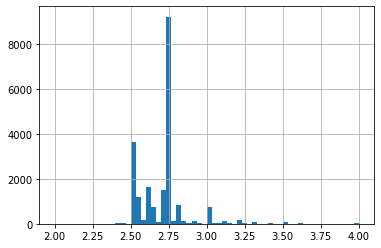

In [42]:
# гистограмма
hist_func('ceiling_height', 2, 4)

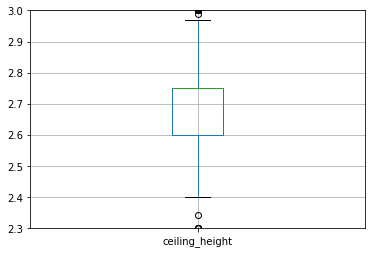

In [43]:
# ящик с усами
boxplot_func('ceiling_height', 2.3, 3)

Нормальное значение высоты потолков - от 2,4 до 2,97 м. Среднее значение - 2,75. Судя по описательной статистике, есть потолки высотой 1 и 32 метрa. Возможно, данные заполнены ошибочно. Они все равно являются выбросами, поэтому не войдут в итоговый датасет.

In [44]:
real['ceiling_height'].describe()

count    21047.000000
mean         2.733831
std          0.791545
min          1.000000
25%          2.600000
50%          2.750000
75%          2.750000
max         32.000000
Name: ceiling_height, dtype: float64

In [45]:
# фильтрация данных
# верхнее пороговое значение взято из комментария ревьюера
real = real.loc[real['ceiling_height'] >= 2.4]
real = real.loc[real['ceiling_height'] <= 4.5]

До изменений было 21047 строк, после фильтрации - сейчас увидим.

In [46]:
real['ceiling_height'].describe()

count    20995.000000
mean         2.707621
std          0.174784
min          2.400000
25%          2.600000
50%          2.750000
75%          2.750000
max          4.500000
Name: ceiling_height, dtype: float64

In [47]:
20995*100/21047

99.75293390982088

Второе задание: 

* изучить время продажи квартиры;
* построить гистограмму;
* посчитать среднее и медиану;
* описать, сколько обычно занимает продажа;
* ответить на вопрос: когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [48]:
# вывод описательной статистики
real['days_exposition'].describe()

count    18471.000000
mean       170.880245
std        208.172037
min          1.000000
25%         43.000000
50%         91.000000
75%        217.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение равно 1429 дней (слишком много, значит, есть выбросы). Медиана - 118 дней (уже лучше).

После удаления маркера среднее значение равно 170 дней, медиана - 91 день. Приемлемо, вроде бы.

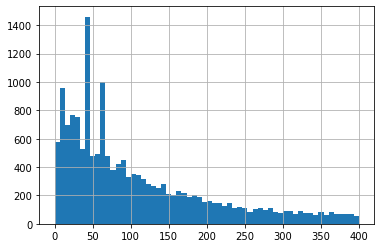

In [49]:
# гистограмма
hist_func('days_exposition', 0, 400)

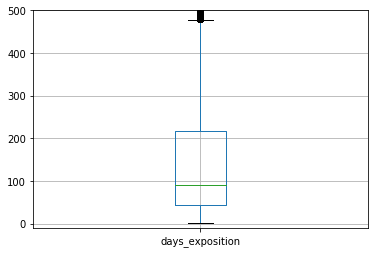

In [50]:
# ящик с усами
boxplot_func('days_exposition', -10, 500)

Нормально, если объявление о продаже квартиры размещено на сайте 845 дней. Больше - уже странно.

Существуют квартиры, которые продаются так долго, однако большинство продается за 45-60 дней (полтора-два месяца). После этого значения количество продаваемых квартир начинает снижаться.

Можно считать, что продажа прошла очень быстро, если объявление закрылось в срок до 45 дней, и очень медленно - если через 370 дней после публикации.

Отфильтруем данные.

Нормально, если объявление о продаже квартиры размещено на сайте примерно 475 дней. Больше - уже странно.

Существуют квартиры, которые продаются так долго, однако большинство продается за 45-60 дней (полтора-два месяца). После этого значения количество продаваемых квартир начинает снижаться.

Можно считать, что продажа прошла очень быстро, если объявление закрылось в срок до 45 дней, и очень медленно - если через 210 дней после публикации (примерно).

In [51]:
# фильтрация данных
real = real.query('0 <= days_exposition <= 845')

Третье задание:

* убрать редкие и выбивающиеся значения;
* описать, какие особенности обнаружены.

Задание выполнено в строчках с фильтрацией датасета по первому и второму заданию.

Четвертое задание:

* определить факторы, больше всего влияющие на стоимость квартиры;
* изучить, зависит ли цена от площади, числа комнат, удаленности от центра;
* изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом;
* изучить зависимость от даты размещения: дня недели, месяца и года.

Выполним задание, используя корреляцию и визуализацию с помощью графика типа "ящик с усами".

Сначала построим матрицу корреляций и определим факторы, больше всего влияющие на стоимость квартиры. Нас интересует столбец `last_price`.

In [52]:
# корреляция по всему датасету
real.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,price_m2,day_exposition,month_exposition,year_exposition,living_total_ratio,kitchen_total_ratio
total_images,1.000000,0.151224,0.090395,0.065071,-0.011066,0.005101,0.074271,0.025015,0.019048,-0.034261,...,0.018762,-0.002048,-0.002795,-0.020753,0.111890,-0.004009,0.019661,0.126406,-0.000596,0.049457
last_price,0.151224,1.000000,0.685739,0.438415,0.300224,0.199640,0.563351,0.133506,0.013998,-0.091585,...,0.217163,0.270161,0.207965,0.049830,0.600552,-0.006690,0.007741,-0.010025,0.024281,-0.010429
total_area,0.090395,0.685739,1.000000,0.807736,0.222011,-0.037094,0.910911,-0.044301,0.010123,-0.147543,...,0.052581,0.100796,0.053615,0.097211,-0.128657,-0.003450,0.005126,-0.078585,0.246177,-0.222117
rooms,0.065071,0.438415,0.807736,1.000000,0.050411,-0.244598,0.887019,-0.189560,-0.008391,-0.211277,...,0.029032,0.033927,0.017017,0.076169,-0.259064,-0.002466,-0.000120,-0.061802,0.545533,-0.377914
ceiling_height,-0.011066,0.300224,0.222011,0.050411,1.000000,0.015905,0.157742,0.011642,0.057374,0.025348,...,0.078447,0.151981,0.062433,0.039931,0.165456,0.004560,0.003180,-0.093844,-0.066353,0.037499
floors_total,0.005101,0.199640,-0.037094,-0.244598,0.015905,1.000000,-0.182392,0.672342,-0.014041,0.093601,...,-0.059739,-0.035744,0.023540,-0.049327,0.339240,0.014487,0.008783,0.022476,-0.364340,0.228820
living_area,0.074271,0.563351,0.910911,0.887019,0.157742,-0.182392,1.000000,-0.148023,0.007636,-0.094092,...,0.048094,0.076009,0.039942,0.087329,-0.199062,0.000480,0.001395,-0.071784,0.604926,-0.395541
floor,0.025015,0.133506,-0.044301,-0.189560,0.011642,0.672342,-0.148023,1.000000,-0.010320,0.054167,...,-0.038090,-0.024548,0.015876,-0.038419,0.249471,0.013242,0.015747,0.013603,-0.269638,0.171565
is_apartment,0.019048,0.013998,0.010123,-0.008391,0.057374,-0.014041,0.007636,-0.010320,1.000000,-0.003727,...,-0.015013,0.012205,0.024990,0.001176,0.011292,-0.008676,-0.009234,0.018567,-0.004413,-0.008053
studio,-0.034261,-0.091585,-0.147543,-0.211277,0.025348,0.093601,-0.094092,0.054167,-0.003727,1.000000,...,-0.024846,-0.004666,-0.002436,-0.036599,0.058402,0.007376,0.017187,0.010942,0.119389,-0.199065


Больше всего на цену квартиры влияют общая (0.69) и жилая (0.56) площадь, площадь кухни (0.38), количество комнат (0.44), а также близость аэропорта (0.34). Близость парков и водоемов (0.2-0.27), номер этажа (0.2) влияют на стоимость в меньшей степени.

Обратная зависимость прослеживается в случае с расстоянием от центра (-0.34): чем оно больше, тем меньше цена.

*Единица равна очень сильной зависимости.

Посмотрим зависимость цены от этажа. Столбец с расположением квартиры на этаже имеет тип строки, значит, корреляцию можно визуализировать, в численном виде `Python` ее не рассчитает.

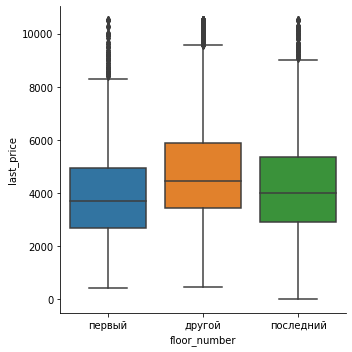

In [53]:
# зависимость цены от этажа
sns.catplot(x = 'floor_number', y = 'last_price', kind = 'box', data = real)

Выходит, что квартиры на первом этаже продаются дешевле, чем на любом другом. Квартиры на последнем этаже продаются несколько дешевле, чем на других.

Теперь нам нужно изучить зависимость от даты размещения: дня недели, месяца и года.

Сначала посмотрим, что там с днем недели.

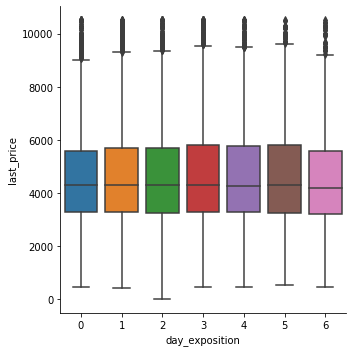

In [54]:
# зависимость цены от дня недели публикации
sns.catplot(x = 'day_exposition', y = 'last_price', kind = 'box', data = real)

На графике не видно особой разницы между днями недели. Только минимальная цена в среду чуть меньше, чем в любой другой день, а максимальная цена в субботу чуть выше. Но это ни о чем не говорит.

Теперь разберемся с месяцами.

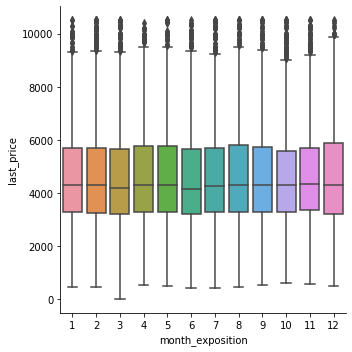

In [55]:
# зависимость цены от месяца публикации
sns.catplot(x = 'month_exposition', y = 'last_price', kind = 'box', data = real)

Разница определенно есть, хоть и не такая большая. Июнь, пожалуй, самый "дешевый" месяц. Самый "дорогой" месяц - апрель. Минимальная цена ниже всего в марте, максимальная цена выше всего в декабре. В целом, можно сказать, что выгоднее всего покупать квартиру в феврале-марте и в летние месяцы.

Наконец, влияние года на цену.

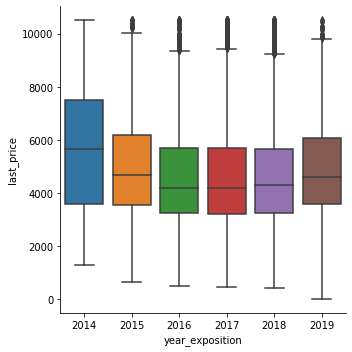

In [56]:
# зависимость цены от года публикации
sns.catplot(x = 'year_exposition', y = 'last_price', kind = 'box', data = real)

Здесь зависимость более явная. В 2014 году была нестабильная экономическая и политическая ситуация, доллар вырос, цены тоже, все стали покупать недвижимость. После этого до 2017 года цены понижались, затем снова стали расти, но до уровня 2014 года недотягивают. Если бы данные были за последние годы, наверняка там были бы большие цифры. Цена на недвижимость все-таки зависит от того, что в целом происходит в стране и в мире в текущем году.

Пятое задание:

* выбрать 10 населенных пунктов с наибольшим числом объявлений;
* посчитать среднюю цену квадратного метра в них;
* выделить населенные пункты с самой высокой и низкой стоимостью жилья.

Чтобы выполнить это задание, создадим сводную таблицу с названиями населенных пунктов, а также числом объявлений в них и медианным значением цены. Отсортируем по убыванию и выведем первые 10 строк.

In [57]:
# создание сводной таблицы
real_pivot_locality_price = real.pivot_table(index = 'locality_name', 
                                             values = 'price_m2', 
                                             aggfunc = ['count', 'median'])
# переименование столбцов
real_pivot_locality_price.columns = ['число объявлений', 'средняя цена кв.м.']
#сортировка и вывод первых 10 строк
real_pivot_locality_price.sort_values('число объявлений', ascending = False).head(10)

,число объявлений,средняя цена кв.м.
locality_name,,
Санкт-Петербург,11518,100.0
посёлок Мурино,504,86.0
посёлок Шушары,399,75.0
Всеволожск,326,65.0
Колпино,301,73.0
посёлок Парголово,297,91.0
деревня Кудрово,289,91.0
Пушкин,272,97.0
Гатчина,255,67.0


Помним, что данные в столбце с ценой квартиры были в тысячах, а цена квадратного метра рассчитывалась по нему, значит и здесь данные в тысячах. Выходит, дороже всего квадратный метр в "культурной столице", а дешевле всего в Выборге.

Шестое задание: 

* изучить предложения квартир;
* выделить квартиры в Санкт-Петербурге;
* выяснить, какая область входит в центр;
* создать столбец с расстоянием до центра в километрах: округлить до целых значений;
* посчитать среднюю цену для каждого километра;
* построить график зависимости цены от удаленности от центра;
* определить границу, где график сильно меняется - это будет центральной зоной.

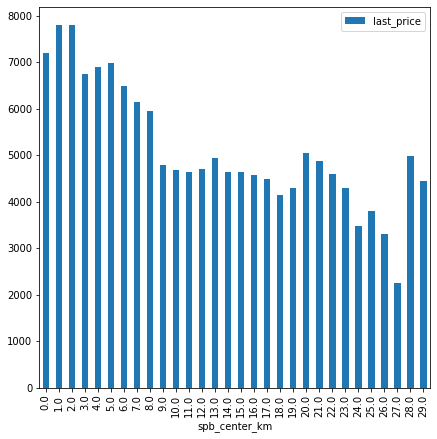

In [58]:
# добавление столбца с километрами
real['spb_center_km'] = real['city_centers_nearest']/1000
# округление
real['spb_center_km'] = real['spb_center_km'].round()
# выделение квартир в Санкт-Петербурге
spb_center = real['locality_name'] == "Санкт-Петербург"
# создание сводной таблицы с ценой одного километра (цена в тысячах)
spb_center_price = real.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'spb_center_km', 
                                                                                values = 'last_price', 
                                                                                aggfunc = 'median')
# визуализация
spb_center_price.plot(y = 'last_price', kind = 'bar', figsize = (7, 7))

Центральной зоной можно считать радиус 0-2 км в Петербурге, после этой границы цены падают. Заметна также разница между 8 и 9 километрами. Вероятно, в городе есть элитные районы, где квартиры находятся не так близко к центру, но все еще имеют довольно высокую цену.

Седьмое задание:

* выделить сегмент квартир в центре;
* проанализировать эту территорию и изучить параметры:  площадь, цена, число комнат, высота потолков;
* выделить факторы влияния на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления);
* сделать вывод и определить, отличается ли он от общих выводов по всей базе.

In [67]:
# выделение квартир в центре
flat_in_center = real[(real['locality_name'] == "Санкт-Петербург") & (real['spb_center_km'] < 3)]

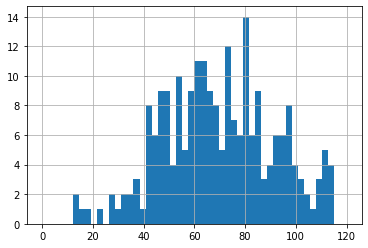

In [68]:
# площадь квартир в центре
flat_in_center['total_area'].hist(bins = 50, range = (0, 120))

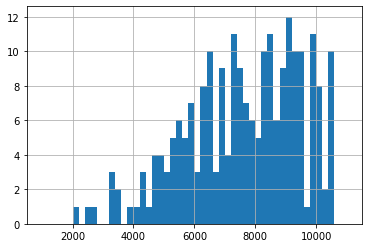

In [72]:
# цена квартир в центре
spb_center_hist_func('last_price', xmin = 1000, xmax = 11000)

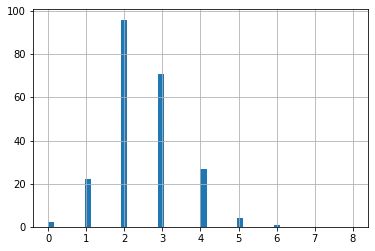

In [70]:
# количество комнат в квартирах в центре
spb_center_hist_func('rooms', xmin = 0, xmax = 8)

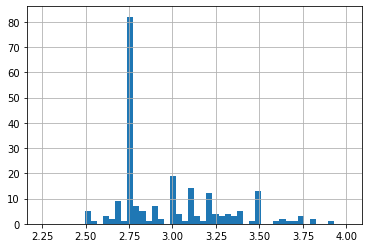

In [71]:
# высота потолков в квартирах в центре
spb_center_hist_func('ceiling_height', xmin = 2.25, xmax = 4)

По поводу квартир в центре Санкт-Петербурга можно утверждать, что:
    
* они имеют большую площадь: если у обычных квартир это 25-60 кв.м., то у центральных - 50-80 кв.м.;
* стоят они дороже обычных: 6-10 млн против 3-5,5 млн;
* комнат в таких квартирах чуть больше (в обычных квартирах 1-2 комнаты, в центральных 2-3);
* потолки в них несколько выше, чем в остальных (на общем графике было больше потолков высотой 2.5 метра, здесь преобладает высота 2.75 м.).

Теперь выделим факторы влияния на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [ ]:
# корреляция цены и числа комнат в центральных квартирах
flat_in_center['last_price'].corr(flat_in_center['rooms'])

In [ ]:
# корреляция цены и номера этажа в центральных квартирах
sns.catplot(x = 'floor_number', y = 'last_price', kind = 'box', data = flat_in_center)

In [ ]:
# корреляция цены и удаленности от центра в центральных квартирах
flat_in_center['last_price'].corr(flat_in_center['spb_center_km'])

In [ ]:
# зависимость цены и дня публикации в центральных квартирах
sns.catplot(x = 'day_exposition', y = 'last_price', kind = 'box', data = flat_in_center)

In [ ]:
# зависимость цены и месяца публикации в центральных квартирах
sns.catplot(x = 'month_exposition', y = 'last_price', kind = 'box', data = flat_in_center)

In [ ]:
# зависимость цены и года публикации в центральных квартирах
sns.catplot(x = 'year_exposition', y = 'last_price', kind = 'box', data = flat_in_center)

Что мы имеем:

* число комнат сильнее влияет на цену квартир в центре, чем где-либо еще;
* в центре дешевле всего покупать квартиру именно на первом этаже;
* зависимость цены от расстояния до центра для центральных квартир выше, чем для остальных квартир;
* дешевле всего купить квартиру в центре в марте (для обычных квартир выгоднее еще и летние месяцы), искать нужно воскресные объявления;
* дешевле всего квартиры стоили в 2017 году, в 2019 тоже можно было найти предложение повыгоднее (обычные квартиры стоили дешевле в 2014-2017 гг.) - экономическая ситуация не особо влияет на недвижимость в центре.

### Вывод

Проделана большая работа. Изучены многие параметры как для всех квартир, так и для квартир в центре. Полученные результаты дадут основу для общего вывода по всему проекту.

## Общий вывод

В итоге нами изучена база объявлений о продаже квартир в Санкт-Петербурге и Ленинградской области за несколько лет. На основе анализа автоматизированная система сможет отслеживать аномалии и мошенническую деятельность.

В этом проекте было сделано многое:

* изучена общая информация о данных;
* изучены и обработаны пропущенные значения, произведены замены;
* в нужных столбцах изменен тип данных;
* установлены параметры: цена квадратного метра, этаж квартиры, день недели, месяц и год публикации объявления, соотношение жилой и общей площади, а также отношение площади кухни к общей;
* установлена связь между разными параметрами и построены графики;
* даны ответы на поставленные вопросы.

Общий вывод по проделанной работе может звучать следующим образом: 

* продажа квартиры обычно происходит за полтора-два месяца, аномалией можно считать срок от 845 дней, меньше 45 дней - быстро, больше 370 дней - долго;
* дороже всего квадратный метр в Санкт-Петербурге и Пушкине, дешевле всего в Выборге;
* центром города можно считать радиус 0-2 км, от 2 до 8 км - элитные районы;
* в центре квартиры стоят примерно в 2 раза дороже;
* нормальная площадь квартиры - от 12 до 115 кв.м.;
* от удаленности от центра цена почти не зависит - это может быть элитная недвижимость или коттеджные поселки;
* больше всего на цену квартиры влияет общая площадь, в меньшей степени площадь жилая и кухонная, количество комнат не особо важно;
* цена не будет сильно зависеть от близости парков, водоемов и аэропорта;
* дата публикации не играет особой роли в привлекательности объявления, но есть некоторые особенности: лучше купить квартиру в марте (особенно актуально для центра) или летом, важно обращать внимание на общую ситуацию в стране, т.к. она все же влияет на цены.

Выгодная квартира - это:

* первый или последний этаж;
* не центр города;
* небольшая общая, жилая и кухонная площадь;
* 1-2 комнаты.